In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import altair as alt
import plotly.express as px
import streamlit as st
import prettytable


In [2]:
starbucks_drinks = pd.read_csv("/Users/sarahbradford/Downloads/starbucks_drinks.csv")
starbucks_drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [3]:
starbucks_drinks['Caffeine (mg)'] = pd.to_numeric(starbucks_drinks['Caffeine (mg)'], errors='coerce')
starbucks_drinks['Caffeine (mg)'].fillna(starbucks_drinks['Caffeine (mg)'].mean(), inplace=True)
starbucks_drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Beverage_category         242 non-null    object 
 1   Beverage                  242 non-null    object 
 2   Beverage_prep             242 non-null    object 
 3   Calories                  242 non-null    int64  
 4   Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)             242 non-null    float64
 6   Saturated Fat (g)         242 non-null    float64
 7   Sodium (mg)               242 non-null    int64  
 8   Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)          242 non-null    int64  
 10  Dietary Fibre (g)         242 non-null    int64  
 11  Sugars (g)                242 non-null    int64  
 12  Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)          242 non-null    object 
 14  Vitamin C 

In [4]:
class_dist = starbucks_drinks['Beverage_category'].value_counts(normalize=True)
# display class dist using prettytable
class_dist_table = prettytable.PrettyTable()
class_dist_table.add_column("Beverage Category", class_dist.index)
class_dist_table.add_column("Percentage", np.round(class_dist.values, 4))
print(class_dist_table)
# display using streamlit
st.write(class_dist_table)
# count of beverage categories

+-----------------------------------+------------+----------------------+
|         Beverage Category         | Percentage |        Count         |
+-----------------------------------+------------+----------------------+
|      Classic Espresso Drinks      |   0.2397   |  0.2396694214876033  |
|          Tazo® Tea Drinks         |   0.2149   | 0.21487603305785125  |
|     Signature Espresso Drinks     |   0.1653   |  0.1652892561983471  |
|    Frappuccino® Blended Coffee    |   0.1488   |  0.1487603305785124  |
|       Shaken Iced Beverages       |   0.0744   |  0.0743801652892562  |
|     Frappuccino® Blended Crème    |   0.0537   | 0.05371900826446281  |
| Frappuccino® Light Blended Coffee |   0.0496   | 0.049586776859504134 |
|             Smoothies             |   0.0372   |  0.0371900826446281  |
|               Coffee              |   0.0165   | 0.01652892561983471  |
+-----------------------------------+------------+----------------------+


In [5]:
print(starbucks_drinks['Beverage_category'].unique())
starbucks_drinks['Beverage_category'] = starbucks_drinks['Beverage_category'].replace('Tazo® Tea Drinks', 'Tea')
# class distribution for tea
starbucks_drinks['Tea'] = starbucks_drinks['Beverage_category'].apply(lambda x: 1 if x == 'Tea' else 0)
class_dist = starbucks_drinks['Tea'].value_counts(normalize=True)
print(class_dist)

['Coffee' 'Classic Espresso Drinks' 'Signature Espresso Drinks'
 'Tazo® Tea Drinks' 'Shaken Iced Beverages' 'Smoothies'
 'Frappuccino® Blended Coffee' 'Frappuccino® Light Blended Coffee'
 'Frappuccino® Blended Crème']
Tea
0    0.785124
1    0.214876
Name: proportion, dtype: float64


In [6]:
starbucks_drinks = starbucks_drinks.drop(['Beverage_category'], axis=1)
starbucks_drinks = starbucks_drinks.drop(['Beverage'], axis=1)

In [7]:
print(starbucks_drinks['Total Fat (g)'].unique())
starbucks_drinks[ 'Total Fat (g)'] = starbucks_drinks[ 'Total Fat (g)'].str.replace('3 2', '3.2')

['0.1' '3.5' '2.5' '0.2' '6' '4.5' '0.3' '7' '5' '0.4' '9' '1.5' '4' '2'
 '8' '3' '11' '0' '1' '10' '15' '13' '0.5' '3 2']


In [8]:
def float_converter(value):
    try:
        return float(str(value).replace('%', ''))
    except (ValueError, TypeError):
        return np.nan

starbucks_drinks = starbucks_drinks.applymap(float_converter)

/var/folders/vr/39kr0w796s379f33dxdl9zrh0000gn/T/ipykernel_3943/2145684054.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  starbucks_drinks = starbucks_drinks.applymap(float_converter)


In [9]:
# perform one hot encoding on the beverage category and beverage prep columns
def onehot_encode(starbucks_drinks, columns, prefixes):
    starbucks_drinks = starbucks_drinks.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(starbucks_drinks[column], prefix=prefix)
        starbucks_drinks = pd.concat([starbucks_drinks, dummies], axis=1)

    # Drop the original columns after processing all specified columns
    starbucks_drinks = starbucks_drinks.drop(columns, axis=1)
    return starbucks_drinks

# Example usage
starbucks_drinks = onehot_encode(
    starbucks_drinks,
    columns=['Beverage_prep'],
    prefixes=['Prep']
)
starbucks_drinks.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Tea
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,175.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,260.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,330.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,410.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,10.0,0.0,20.0,0.0,75.0,0.0


In [10]:
# scale the data
X = starbucks_drinks.drop(['Tea'], axis=1)
y = starbucks_drinks['Tea']
starbucks_scaler = StandardScaler()
X = starbucks_scaler.fit_transform(X)

In [11]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

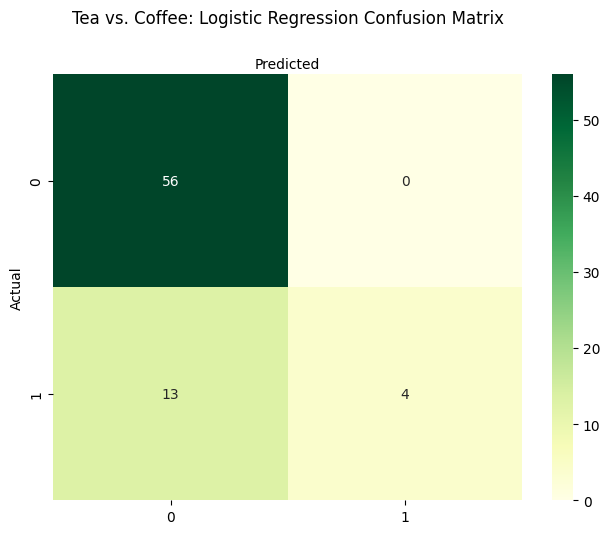

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        56
         1.0       1.00      0.24      0.38        17

    accuracy                           0.82        73
   macro avg       0.91      0.62      0.64        73
weighted avg       0.86      0.82      0.78        73



In [12]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix
# plot confusion matrix
class_names = ['Coffee', 'Tea']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGn", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Tea vs. Coffee: Logistic Regression Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
# classification report
print(metrics.classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set: 0.78


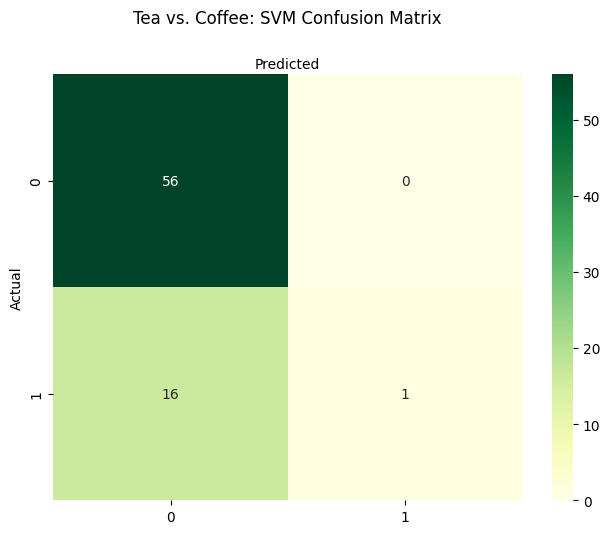

In [13]:
# SVM 
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))
# confusion matrix
svm_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
svm_confusion_matrix
# plot confusion matrix
class_names = ['Coffee', 'Tea']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(svm_confusion_matrix), annot=True, cmap="YlGn", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Tea vs. Coffee: SVM Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy of Decision Tree classifier on test set: 0.95


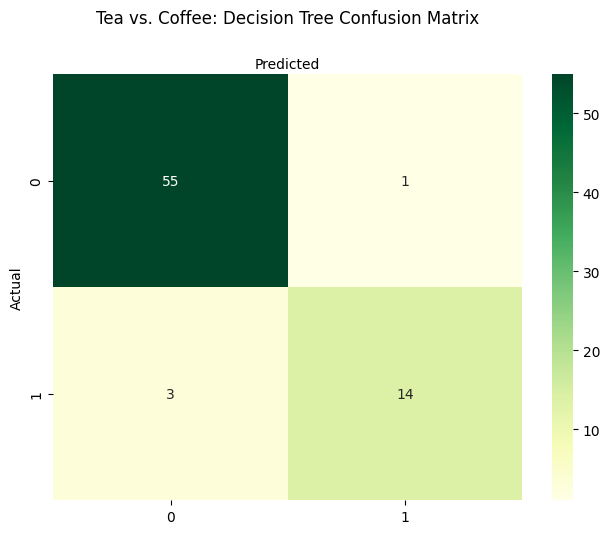

In [14]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))
# confusion matrix
dtree_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
dtree_confusion_matrix
# plot confusion matrix
class_names = ['Coffee', 'Tea']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(dtree_confusion_matrix), annot=True, cmap="YlGn", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Tea vs. Coffee: Decision Tree Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy of Random Forest classifier on test set: 0.89


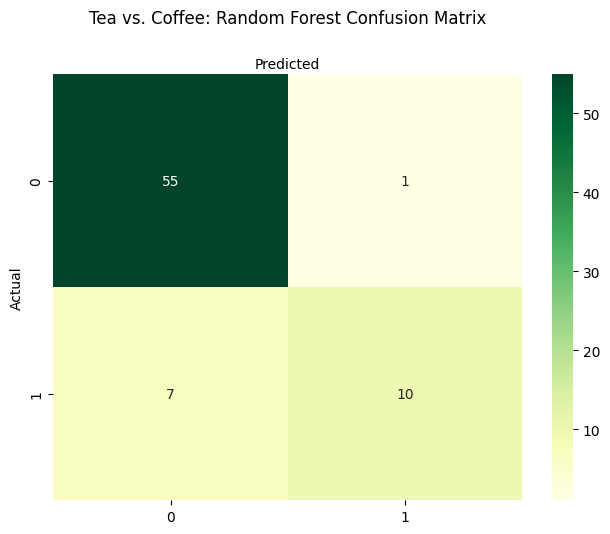

In [15]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
# confusion matrix
rf_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
rf_confusion_matrix
# plot confusion matrix
class_names = ['Coffee', 'Tea']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(rf_confusion_matrix), annot=True, cmap="YlGn", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Tea vs. Coffee: Random Forest Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Accuracy of KNN classifier on test set: 0.86


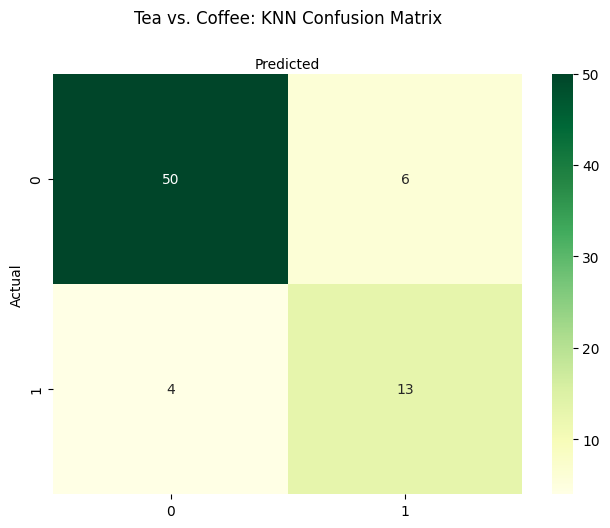

In [16]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
# confusion matrix
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
knn_confusion_matrix
# plot confusion matrix
class_names = ['Coffee', 'Tea']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(knn_confusion_matrix), annot=True, cmap="YlGn", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Tea vs. Coffee: KNN Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Accuracy of Naive Bayes classifier on test set: 0.60


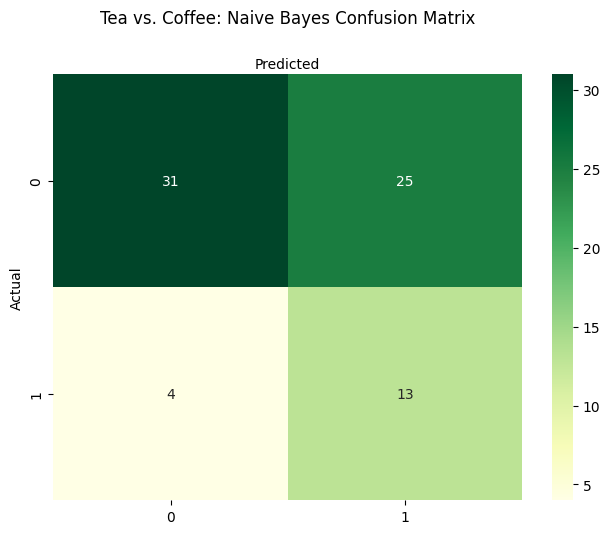

In [17]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(nb.score(X_test, y_test)))
# confusion matrix
nb_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
nb_confusion_matrix
# plot confusion matrix
class_names = ['Coffee', 'Tea']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(nb_confusion_matrix), annot=True, cmap="YlGn", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Tea vs. Coffee: Naive Bayes Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [18]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))
# confusion matrix
xgb_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
xgb_confusion_matrix
# plot confusion matrix
class_names = ['Coffee', 'Tea']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(xgb_confusion_matrix), annot=True, cmap="YlGn", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Tea vs. Coffee: XGBoost Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ModuleNotFoundError: No module named 'xgboost'